### Import libraries

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import make_column_selector as selector
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
)
from scipy.stats import norm
from imblearn.over_sampling import SMOTE


In [129]:
df=pd.read_csv('sample.csv')

## Descriptive analytics

In [3]:
df.columns

Index(['ID', 'PoolCutoffDate', 'LoanOriginationDate', 'DateOfLoanMaturity',
       'BorrowersEmploymentStatus', 'BorrowerType', 'BorrowerYearOfBirth',
       'BorrowerCreditQuality', 'BureauScoreValue', 'ConstructionYear',
       'CurrentInterestRate', 'CurrentInterestRateMargin', 'FinalMargin',
       'CurrentValuationAmount', 'FirstTimeBuyer', 'FlexibleLoanAmount',
       'CurrentBalance', 'OriginalBalance', 'ForeignNational',
       'GeographicRegionList', 'LoanAge', 'Purpose', 'CLTV', 'TotalIncome',
       'target'],
      dtype='object')

### Pies for categorical values

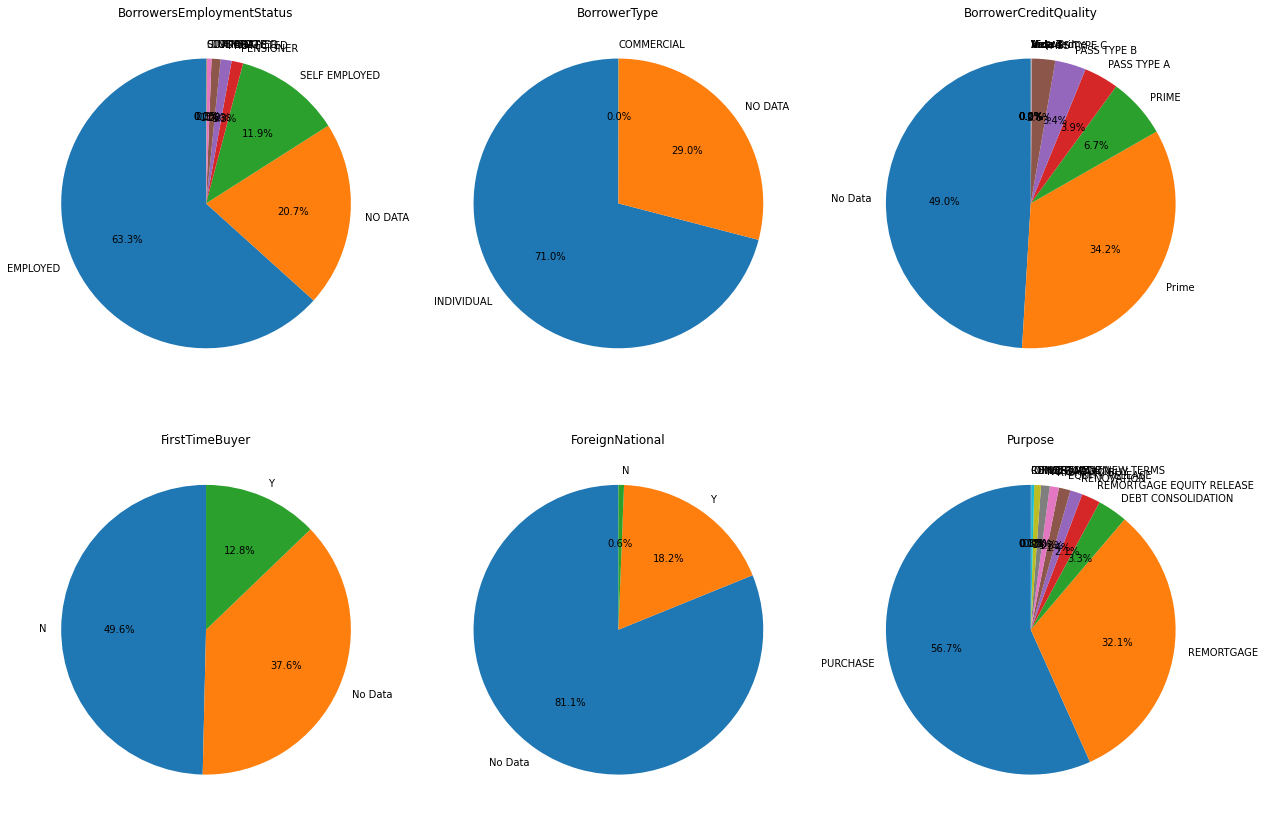

In [4]:
categorical_variables = [
    'BorrowersEmploymentStatus',
    'BorrowerType',
    'BorrowerCreditQuality',
    'FirstTimeBuyer',
    'ForeignNational',
    'Purpose'
]

n_cols = 3  
n_rows = (len(categorical_variables) + n_cols - 1) // n_cols  
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6 * n_rows))
axes = axes.flatten()

for i, col in enumerate(categorical_variables):
    values = df[col].value_counts()
    axes[i].pie(values, labels=values.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f"{col}")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### BorrowersEmploymentStatus

In [5]:
cross_tab = pd.crosstab(df['BorrowersEmploymentStatus'], df['target'])
cross_tab['feature_percentage'] = cross_tab.sum(axis=1) / len(df) 
print(cross_tab)

target                         0      1  feature_percentage
BorrowersEmploymentStatus                                  
CORPORATE                     65     28            0.000948
EMPLOYED                   47110  14999            0.633164
NO DATA                    12635   7672            0.207018
OTHER                        773    206            0.009980
PENSIONER                    844    415            0.012835
PROTECTED                    502    703            0.012284
SELF EMPLOYED               7970   3668            0.118643
STUDENT                       15      3            0.000183
UNEMPLOYED                   306    179            0.004944


In [6]:
# Cross-tabulation of BorrowersEmploymentStatus and target
contingency_table = pd.crosstab(df['BorrowersEmploymentStatus'], df['target'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f'Chi-square statistic: {chi2}, p-value: {p}')

Chi-square statistic: 2074.2414095601, p-value: 0.0


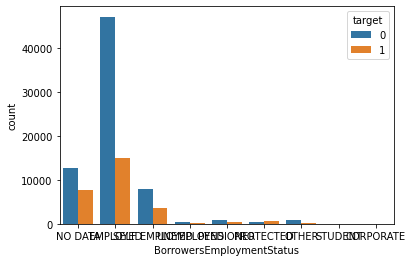

In [7]:
sns.countplot(x='BorrowersEmploymentStatus', hue='target', data=df)
plt.show()

We used Logistic Regression (Logit model) to estimate the probability of default (target variable). Logistic regression is suitable for binary classification problems, where the model predicts the probability that an event (default = 1, no default = 0) occurs based on input features. It uses the logistic function to model the log-odds of the target variable as a linear combination of the input features.

Since BorrowersEmploymentStatus is a categorical variable, we applied one-hot encoding to convert it into binary features, each representing a category (e.g., "Employed", "Unemployed", etc.). This allowed the model to interpret each employment status category separately.

In [8]:
# Logit model
X = pd.get_dummies(df[['BorrowersEmploymentStatus']], drop_first=True)  
X = sm.add_constant(X) 

model = sm.Logit(df['target'], X)
result = model.fit()
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.586727
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                98093
Model:                          Logit   Df Residuals:                    98084
Method:                           MLE   Df Model:                            8
Date:                Tue, 21 Jan 2025   Pseudo R-squ.:                 0.01693
Time:                        22:22:39   Log-Likelihood:                -57554.
converged:                       True   LL-Null:                       -58545.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.8422

After assessing the statistical significance of each one-hot encoded category, we found that most of them had high p-values (greater than 0.05), indicating they were not significantly related to the target variable (probability of default). Since including these non-significant features could unnecessarily complicate the model without improving predictive performance, we decided to drop BorrowersEmploymentStatus.

In [9]:
candidate_drop_list = []
candidate_drop_list.append('BorrowersEmploymentStatus')

In [10]:
len(df.columns)

25

#### BorrowerType

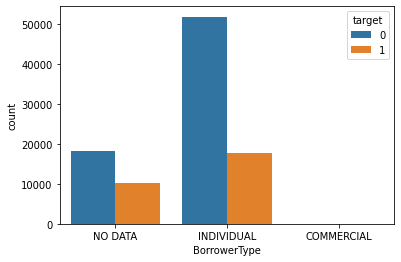

In [11]:
sns.countplot(x='BorrowerType', hue='target', data=df)
plt.show()

In [12]:
# Logit model
X = pd.get_dummies(df[['BorrowerType']], drop_first=True)  
X = sm.add_constant(X) 

model = sm.Logit(df['target'], X)
result = model.fit()
print(result.summary())



         Current function value: 0.591324
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                98093
Model:                          Logit   Df Residuals:                    98090
Method:                           MLE   Df Model:                            2
Date:                Tue, 21 Jan 2025   Pseudo R-squ.:                0.009224
Time:                        22:22:48   Log-Likelihood:                -58005.
converged:                      False   LL-Null:                       -58545.
Covariance Type:            nonrobust   LLR p-value:                3.052e-235
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     -18.8748   2806.944     -0.007      0.995   -5520.384    5482.634
BorrowerType_INDIVIDUAL   

/Users/petroschatzopoulos/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


It is clear that does not provide any predictive power Pseudo R-squ is very low, p-values are very high and also we have too many missing values so we drop it from our analysis.

In [13]:
df = df.drop('BorrowerType', axis=1)
len(df.columns)

24

#### BorrowerCreditQuality

We replace the 'Prime' with 'PRIME' and we only hold one label since it seems to be the same value.

In [14]:
df['BorrowerCreditQuality'] = df['BorrowerCreditQuality'].replace({'Prime': 'PRIME'})
print(df['BorrowerCreditQuality'].value_counts())

No Data        48105
PRIME          40144
PASS TYPE A     3795
PASS TYPE B     3380
PASS TYPE C     2529
Vida 1            57
Acquired          49
Vida 2            13
Vida 3             8
Near Prime         7
Vida 4             5
Vida 5             1
Name: BorrowerCreditQuality, dtype: int64


In [15]:
cross_tab = pd.crosstab(df['BorrowerCreditQuality'], df['target'])
cross_tab['feature_percentage'] = cross_tab.sum(axis=1) / len(df) 
print(cross_tab)

target                     0      1  feature_percentage
BorrowerCreditQuality                                  
Acquired                  26     23            0.000500
Near Prime                 2      5            0.000071
No Data                31104  17001            0.490402
PASS TYPE A             2642   1153            0.038688
PASS TYPE B             2129   1251            0.034457
PASS TYPE C             1315   1214            0.025782
PRIME                  32940   7204            0.409244
Vida 1                    45     12            0.000581
Vida 2                     8      5            0.000133
Vida 3                     6      2            0.000082
Vida 4                     3      2            0.000051
Vida 5                     0      1            0.000010


In [16]:
contingency_table = pd.crosstab(df['BorrowerCreditQuality'], df['target'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi-square statistic: {chi2}, p-value: {p}')

Chi-square statistic: 3924.6501571246513, p-value: 0.0


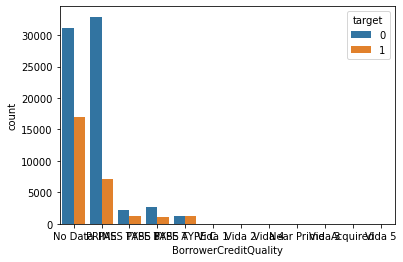

In [17]:
sns.countplot(x='BorrowerCreditQuality', hue='target', data=df)
plt.show()

In [18]:
X = pd.get_dummies(df[['BorrowerCreditQuality']], drop_first=True)  
X = sm.add_constant(X)  # Adding constant for intercept

model = sm.Logit(df['target'], X)
result = model.fit()
print(result.summary())

         Current function value: 0.576279
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                98093
Model:                          Logit   Df Residuals:                    98081
Method:                           MLE   Df Model:                           11
Date:                Tue, 21 Jan 2025   Pseudo R-squ.:                 0.03443
Time:                        22:22:59   Log-Likelihood:                -56529.
converged:                      False   LL-Null:                       -58545.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.1226      0.286     -0.428      0.668      -0.684       0.

/Users/petroschatzopoulos/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Since the PRIME is the one which is significant (Vida1 is close but we dont have to much values) we will keep a flag of whether or not BorrowerCreditQuality == Prime

In [19]:
df['is_PRIME'] = (df['BorrowerCreditQuality'] == 'PRIME').astype(int)
print(df['is_PRIME'].value_counts())
df = df.drop('BorrowerCreditQuality', axis=1)
len(df.columns)
candidate_drop_list.append('is_PRIME')

0    57949
1    40144
Name: is_PRIME, dtype: int64


In [20]:
candidate_drop_list

['BorrowersEmploymentStatus', 'is_PRIME']

#### FirstTimeBuyer

In [21]:
cross_tab = pd.crosstab(df['FirstTimeBuyer'], df['target'])
cross_tab['default_rate'] = cross_tab[1] / cross_tab.sum(axis=1)
cross_tab['feature_percentage'] = cross_tab.sum(axis=1) / len(df)

print(cross_tab)

target              0      1  default_rate  feature_percentage
FirstTimeBuyer                                                
N               36718  11967      0.245805            0.496317
No Data         24421  12415      0.337034            0.375525
Y                9081   3491      0.277681            0.128167


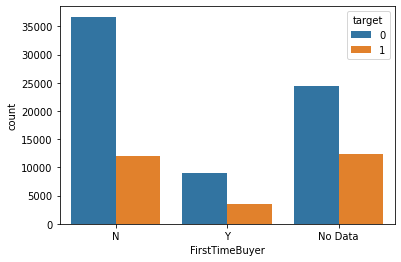

In [22]:
sns.countplot(x='FirstTimeBuyer', hue='target', data=df)
plt.show()

In [23]:
X = pd.get_dummies(df[['FirstTimeBuyer']], drop_first=True)  
X = sm.add_constant(X)  # Adding constant for intercept

model = sm.Logit(df['target'], X)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.592474
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                98093
Model:                          Logit   Df Residuals:                    98090
Method:                           MLE   Df Model:                            2
Date:                Tue, 21 Jan 2025   Pseudo R-squ.:                0.007298
Time:                        22:23:08   Log-Likelihood:                -58118.
converged:                       True   LL-Null:                       -58545.
Covariance Type:            nonrobust   LLR p-value:                2.805e-186
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -1.1211      0.011   -106.509      0.000      -1.142      

We will drop the FirstTimeBuyer feature from the model because the R-squared is quite low, indicating it doesn't significantly improve our predictions. Additionally, the means for the feature don't show a clear difference between whether someone has already taken a loan or not, and most importantly, there are too many N/A values (37.5%), which could introduce unnecessary randomness into the model.

In [24]:
df = df.drop('FirstTimeBuyer', axis=1)
len(df.columns)

23

#### ForeignNational

In [25]:
cross_tab = pd.crosstab(df['ForeignNational'], df['target'])
cross_tab['default_rate'] = cross_tab[1] / cross_tab.sum(axis=1)
cross_tab['feature_percentage'] = cross_tab.sum(axis=1) / len(df)

print(cross_tab)



target               0      1  default_rate  feature_percentage
ForeignNational                                                
N                  479    131      0.214754            0.006221
No Data          56376  23219      0.291714            0.811427
Y                13365   4523      0.252851            0.182360


In [26]:
X = pd.get_dummies(df[['ForeignNational']], drop_first=True)  
X = sm.add_constant(X)  

model = sm.Logit(df['target'], X)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.596188
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                98093
Model:                          Logit   Df Residuals:                    98090
Method:                           MLE   Df Model:                            2
Date:                Tue, 21 Jan 2025   Pseudo R-squ.:                0.001074
Time:                        22:23:13   Log-Likelihood:                -58482.
converged:                       True   LL-Null:                       -58545.
Covariance Type:            nonrobust   LLR p-value:                 4.945e-28
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -1.2965      0.099    -13.150      0.000      -1.490   

We will drop the ForeignNational feature from the model due to its very low R-squared, which suggests it doesn't contribute significantly to the predictions. Additionally, the case of whether a client is foreign does not appear to be statistically significant. Most importantly, the large proportion of N/A values (81%) raises concerns, as clients may strategically choose not to disclose their nationality to avoid jeopardizing their mortgage approval. Since it’s difficult to accurately estimate with the current data, we don't want to introduce additional randomness to our model by including this feature.

In [27]:
df = df.drop('ForeignNational', axis=1)
len(df.columns)

22

#### Purpose

In [28]:
cross_tab = pd.crosstab(df['Purpose'], df['target'])
cross_tab['default_rate'] = cross_tab[1] / cross_tab.sum(axis=1)
cross_tab['feature_percentage'] = cross_tab.sum(axis=1) / len(df)
print(cross_tab)

target                         0      1  default_rate  feature_percentage
Purpose                                                                  
CONSTRUCTION                   2      0      0.000000            0.000020
DEBT CONSOLIDATION          1888   1383      0.422806            0.033350
EQUITY RELEASE               714    560      0.439560            0.012992
INVESTMENT                   530    203      0.276944            0.007475
NO DATA                      651    298      0.314015            0.009678
OTHER                        190    114      0.375000            0.003103
PURCHASE                   40057  15569      0.279887            0.567077
REMORTGAGE                 23383   8086      0.256951            0.320810
REMORTGAGE EQUITY RELEASE   1268    788      0.383268            0.020964
REMORTGAGE NEW TERMS          59     10      0.144928            0.000705
RENOVATION                   974    364      0.272048            0.013643
RIGHT TO BUY                 504    49

In [29]:
df_filtered = df[df['Purpose'] != 'CONSTRUCTION']
X = pd.get_dummies(df_filtered[['Purpose']], drop_first=True)
X = sm.add_constant(X)
model = sm.Logit(df_filtered['target'], X)
result = model.fit()

print(result.summary())


Optimization terminated successfully.
         Current function value: 0.592418
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                98091
Model:                          Logit   Df Residuals:                    98080
Method:                           MLE   Df Model:                           10
Date:                Tue, 21 Jan 2025   Pseudo R-squ.:                0.007400
Time:                        22:23:19   Log-Likelihood:                -58111.
converged:                       True   LL-Null:                       -58544.
Covariance Type:            nonrobust   LLR p-value:                1.081e-179
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.3113      0.035     -8

We will keep the Purpose feature in the model because several of its categories, such as Purpose_INVESTMENT, Purpose_PURCHASE, and Purpose_REMORTGAGE, are statistically significant and contribute valuable predictive information for identifying default risk.

In [30]:
len(df.columns)

22

#### GeographicRegionList

GeographicRegionList
UKD11    0.503838
UKN01    0.485050
UKM21    0.471042
UKE11    0.462439
UKC11    0.457433
           ...   
UKJ21    0.135294
UKL24    0.122449
UKJ13    0.112628
UKM66    0.083333
UKM65    0.000000
Name: target, Length: 134, dtype: float64


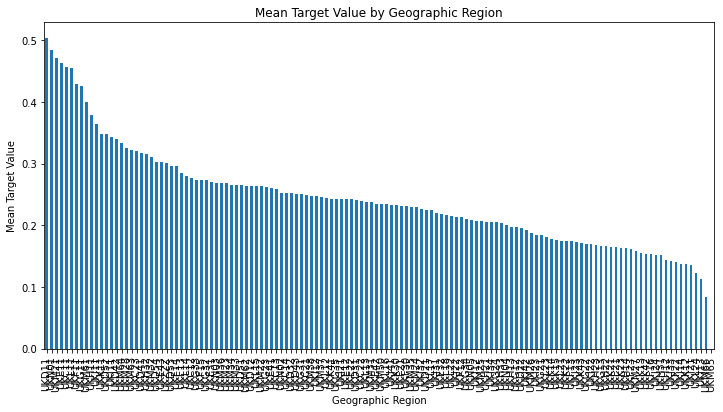

In [31]:
# Calculate mean target value by region
region_target_mean = df.groupby('GeographicRegionList')['target'].mean()
print(region_target_mean.sort_values(ascending=False))

region_target_mean.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6))
plt.title('Mean Target Value by Geographic Region')
plt.ylabel('Mean Target Value')
plt.xlabel('Geographic Region')
plt.xticks(rotation=90)
plt.show()

Since it is quite clear that there is a pattern of the default rates based on the GeographicRegionList we would like to use it as in input in our model. However we have too many distinct values for this feature so we will implement __target encoding__. In target encoding, you map categorical features (like geographic region codes) to a numeric value based on the average of the target variable (mean target value in your case). This is particularly useful when the categories have different relationships with the target variable.

In [32]:
mean_target_by_region = df.groupby('GeographicRegionList')['target'].mean().to_dict()
df['Region'] = df['GeographicRegionList'].map(mean_target_by_region)
df['Region']

0        0.426566
1        0.503838
2        0.343023
3        0.348446
4        0.462439
           ...   
98088    0.300429
98089    0.242321
98090    0.242321
98091    0.242321
98092    0.250653
Name: Region, Length: 98093, dtype: float64

In [33]:
df = df.drop('GeographicRegionList', axis=1)
len(df.columns)

22

### Histograms for continous variables

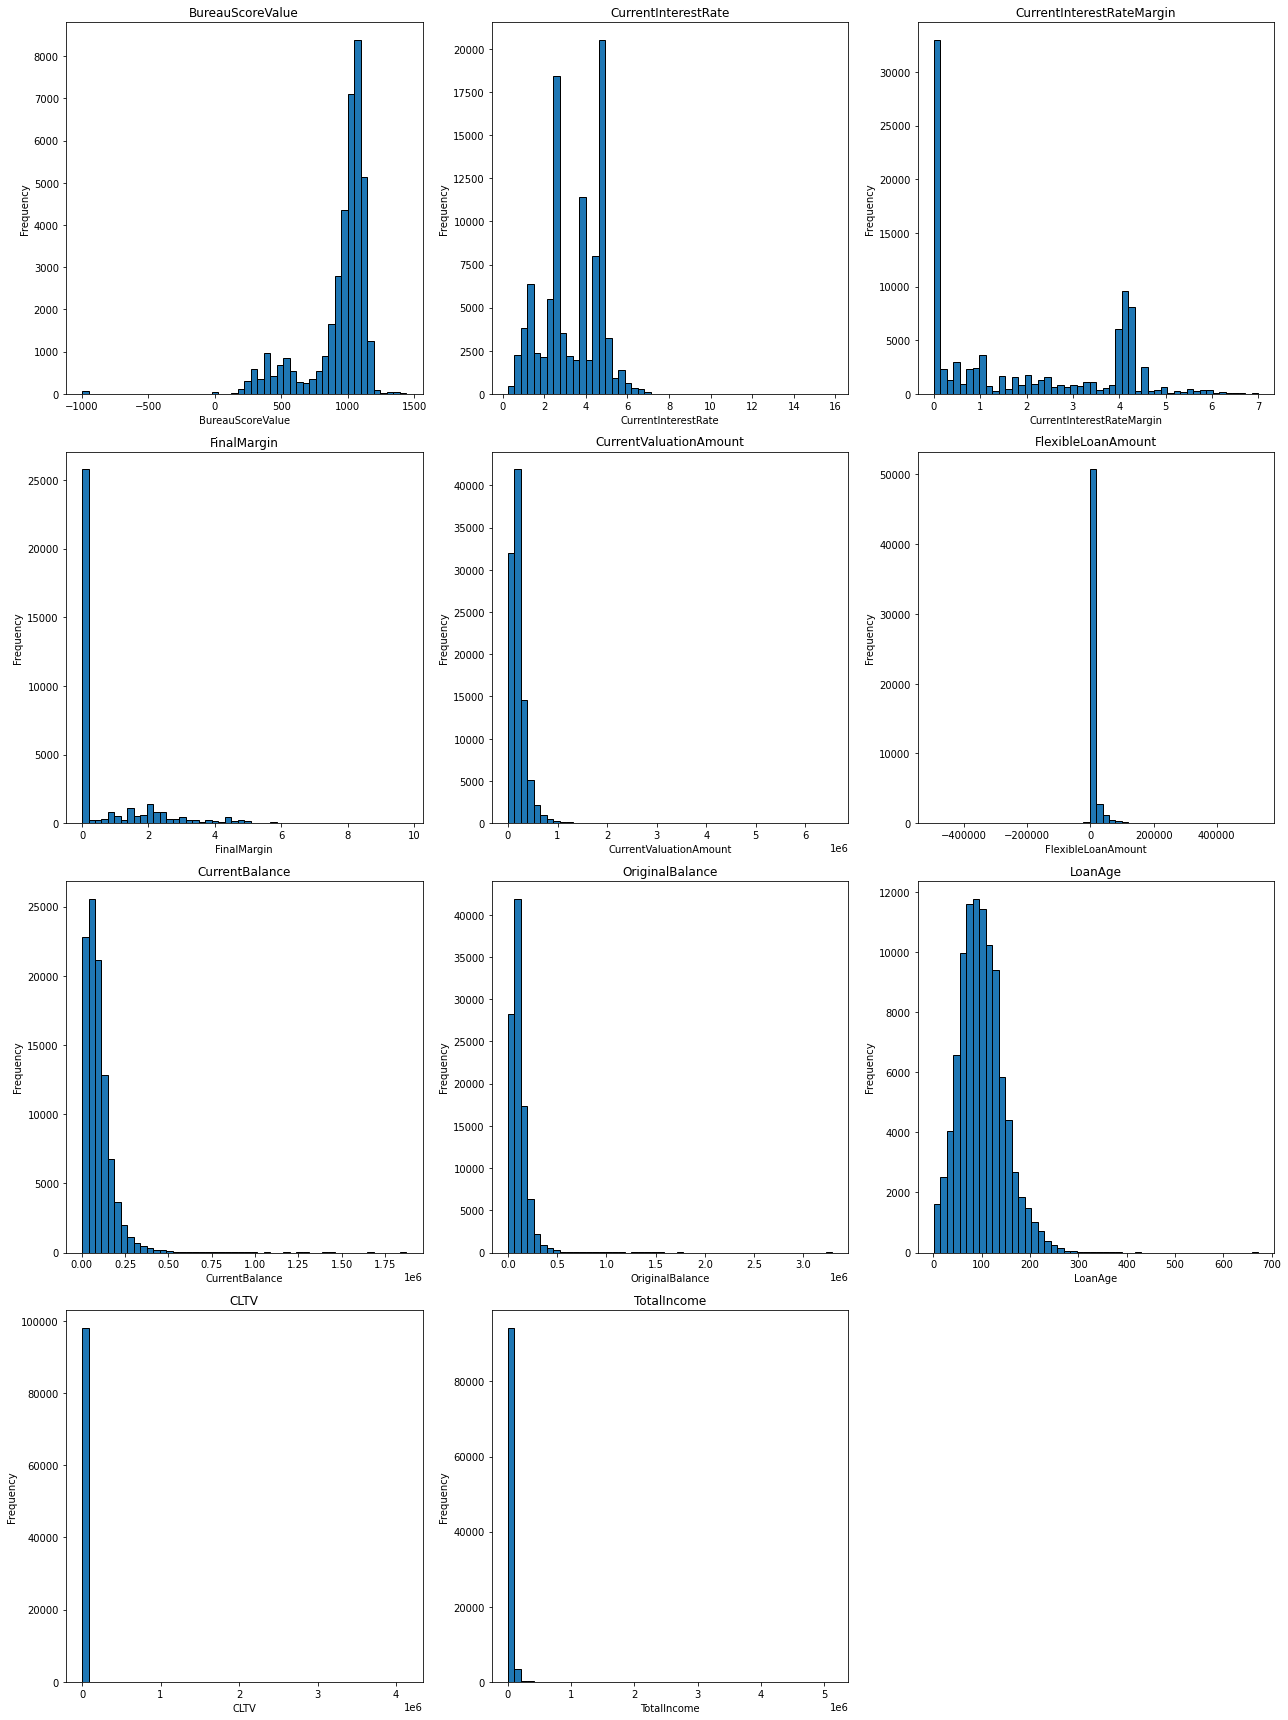

In [34]:

continuous_variables = [
    'BureauScoreValue', 
    'CurrentInterestRate', 'CurrentInterestRateMargin', 'FinalMargin',
    'CurrentValuationAmount', 'FlexibleLoanAmount', 'CurrentBalance',
    'OriginalBalance', 'LoanAge', 'CLTV', 'TotalIncome'
]

n_cols = 3  
n_rows = (len(continuous_variables) + n_cols - 1) // n_cols  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6 * n_rows))
axes = axes.flatten()

for i, col in enumerate(continuous_variables):
    # Drop missing values for the variable
    values = df[col]#.dropna()
    
    # Plot the histogram
    axes[i].hist(values, bins=50, edgecolor='black')
    axes[i].set_title(f"{col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### Correlation matrix

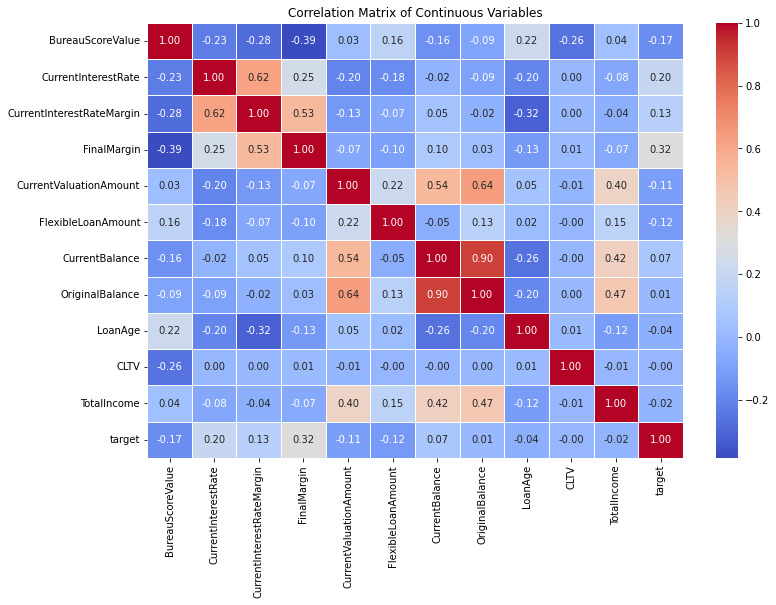

In [35]:
continuous_variables2 = [
    'BureauScoreValue', 
    'CurrentInterestRate', 'CurrentInterestRateMargin', 'FinalMargin',
    'CurrentValuationAmount', 'FlexibleLoanAmount', 'CurrentBalance',
    'OriginalBalance', 'LoanAge', 'CLTV', 'TotalIncome', 'target'
]

# Calculate the correlation matrix for the continuous variables
correlation_matrix = df[continuous_variables2].corr()

# Plotting the correlation matrix using seaborn heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Continuous Variables')
plt.show()

The correlation matrix for the continuous variables reveals several important relationships. A strong positive correlation of 0.62 is observed between __CurrentInterestRateMargin__ and __CurrentInterestRate__, which is expected as the margin typically depends on the base interest rate. There is a very high positive correlation of 0.90 between __OriginalBalance__ and __CurrentBalance__, indicating that the current balance is closely related to the original balance, as expected. A moderate positive correlation of 0.54 is seen between __CurrentValuationAmount__ and __FlexibleLoanAmount__, suggesting that higher valuations tend to be associated with higher flexible loan amounts. Additionally, __CLTV__ (Current Loan-to-Value) and __OriginalBalance__ show a moderate positive correlation of 0.64, meaning as the original loan balance increases, the loan-to-value ratio tends to increase.

Other continuous variables show moderate to weak correlations. For example, __LoanAge__ and __CurrentBalance__ are moderately correlated at 0.54, indicating that older loans tend to have a smaller remaining balance. __TotalIncome__ and __CurrentValuationAmount__ show a moderate correlation of 0.40, suggesting that higher-income borrowers are likely to have higher property valuations. A weak negative correlation of -0.23 is found between __BureauScoreValue__ and __CurrentInterestRate__, indicating that higher credit scores may slightly reduce the interest rate, though the relationship is not strong.

Some variables, such as __BureauScoreValue__, show weak correlations with other variables, indicating that it provides distinct information unrelated to other continuous variables. Similarly, __CLTV__ is not strongly correlated with most other variables, suggesting it is somewhat independent. __LoanAge__ primarily correlates with __CurrentBalance__, showing weak relationships with other features.

Given the correlations observed, it makes sense to drop __OriginalBalance__ or __CurrentBalance__ due to their very high correlation (0.90), which could cause multicollinearity in models like logistic regression. Features such as __LoanAge__, __TotalIncome__, and __CLTV__ show moderate correlations with the target and are likely important predictors. On the other hand, __BureauScoreValue__ appears to be relatively independent and may be useful for capturing distinct insights. In summary, variables with high correlations to the target and each other, like __CurrentBalance__ and __CLTV__, should be considered for model inclusion, but techniques like dimensionality reduction or regularization may be necessary to address multicollinearity.


### Date features

In [36]:
dates_columns = ['PoolCutoffDate', 'LoanOriginationDate', 'DateOfLoanMaturity']#,'BorrowerYearOfBirth','ConstructionYear']

In [37]:
date_columns = ['PoolCutoffDate', 'LoanOriginationDate', 'DateOfLoanMaturity']

def clean_dates_multi_format(df, date_cols):
    for col in date_cols:
        df[col] = df[col].replace("00:00.0", pd.NA)
        
        # Format 1: "MM/DD/YYYY"
        format_1 = df[col].str.contains(r'^\d{1,2}/\d{1,2}/\d{4}$', na=False)
        df.loc[format_1, col] = pd.to_datetime(df.loc[format_1, col], format='%m/%d/%Y', errors='coerce')
        
        # Format 2: "MM/DD/YYYY HH:MM"
        format_2 = df[col].str.contains(r'^\d{1,2}/\d{1,2}/\d{4} \d{1,2}:\d{2}$', na=False)
        df.loc[format_2, col] = pd.to_datetime(df.loc[format_2, col], format='%m/%d/%Y %H:%M', errors='coerce')
        
        if pd.api.types.is_datetime64_any_dtype(df[col]):
            df[col] = df[col].dt.date 
    
    return df

df = clean_dates_multi_format(df, date_columns)

print(df[date_columns].info())
print(df[date_columns].head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98093 entries, 0 to 98092
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   PoolCutoffDate       97603 non-null  object
 1   LoanOriginationDate  97603 non-null  object
 2   DateOfLoanMaturity   97603 non-null  object
dtypes: object(3)
memory usage: 2.2+ MB
None
        PoolCutoffDate  LoanOriginationDate   DateOfLoanMaturity
0  2016-12-31 00:00:00  2008-01-01 00:00:00  2025-01-01 00:00:00
1  2017-12-31 00:00:00  2001-01-01 00:00:00  2026-01-01 00:00:00
2  2017-05-31 00:00:00  2005-07-01 00:00:00  2030-07-01 00:00:00
3  2016-03-31 00:00:00  2008-04-01 00:00:00  2033-04-01 00:00:00
4  2018-03-31 00:00:00  2006-01-01 00:00:00  2031-01-01 00:00:00


### Missing values

In [38]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
}).sort_values(by='Percentage (%)', ascending=False)

print(missing_summary)

                           Missing Values  Percentage (%)
ConstructionYear                    78156       79.675410
FinalMargin                         61618       62.815899
BureauScoreValue                    59904       61.068578
FlexibleLoanAmount                  42040       42.857288
BorrowerYearOfBirth                 41517       42.324121
LoanOriginationDate                   490        0.499526
DateOfLoanMaturity                    490        0.499526
PoolCutoffDate                        490        0.499526
CurrentValuationAmount                 36        0.036700
CLTV                                   29        0.029564
LoanAge                                 0        0.000000
is_PRIME                                0        0.000000
target                                  0        0.000000
TotalIncome                             0        0.000000
Purpose                                 0        0.000000
ID                                      0        0.000000
OriginalBalanc

1) ConstructionYear will be dropped because it has a high percentage of missing values (79.7%) and attempting to impute it would likely introduce too much randomness into the model, which could negatively affect its performance.

2) FinalMargin will be dropped because it is highly correlated with both CurrentInterestRate and CurrentInterestRateMargin, making it redundant. Additionally, it has a significant amount of missing data, and imputing it would not add meaningful value to the model.

3) BureauScoreValue is closely related to what we aim to estimate, making it a good starting point. However, with approximately 61% of the values missing, imputing them would introduce too much uncertainty. Simply imputing with the median would add noise to the model, potentially leading to misleading results. Additionally, attempting to impute it using a model would essentially replicate the task we are already trying to solve, so it doesn't make much sense to keep it. Therefore, we have decided to drop it.

In [39]:
df = df.drop(columns=['ConstructionYear', 'FinalMargin', 'BureauScoreValue'])
len(df.columns)

19

#### ClientAge

In [40]:

df_age = df.copy()
df_age['PoolCutoffDate'] = pd.to_datetime(df_age['PoolCutoffDate'], errors='coerce')
df_age['ClientAge'] = df_age['PoolCutoffDate'].dt.year - df_age['BorrowerYearOfBirth']
df_age = df_age.dropna(subset=['ClientAge', 'BorrowerYearOfBirth', 'PoolCutoffDate'])
correlation = df_age[['ClientAge', 'target']].corr()
print(correlation)


           ClientAge    target
ClientAge   1.000000  0.110008
target      0.110008  1.000000


/var/folders/31/blwpwgyn3gv_vbnpbq2106qw0000gn/T/ipykernel_3376/3424542850.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_group_default_rate.index, y=age_group_default_rate.values, palette='coolwarm')


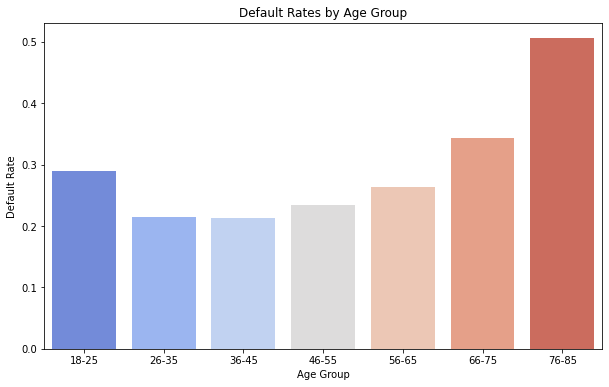

In [41]:

bins = [18, 25, 35, 45, 55, 65, 75, 85]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-85']
df_age['AgeGroup'] = pd.cut(df_age['ClientAge'], bins=bins, labels=labels, right=False)
age_group_default_rate = df_age.groupby('AgeGroup')['target'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_default_rate.index, y=age_group_default_rate.values, palette='coolwarm')
plt.title('Default Rates by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Default Rate')
plt.show()

In [42]:
candidate_drop_list.append('ClientAge')
candidate_drop_list

['BorrowersEmploymentStatus', 'is_PRIME', 'ClientAge']

#### FlexibleLoanAmount

In [43]:
flexible_loan_stats = df['FlexibleLoanAmount'].describe()

# Display statistics
print(flexible_loan_stats)

count     56053.000000
mean       5262.716415
std       19202.408592
min     -495956.280000
25%           0.000000
50%           0.000000
75%         240.000000
max      531173.440000
Name: FlexibleLoanAmount, dtype: float64


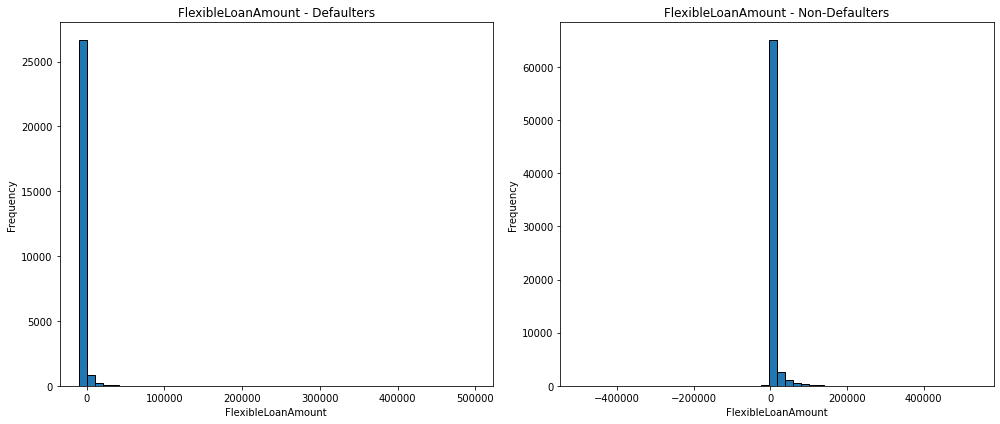

In [48]:

fig, axes = plt.subplots(1, 2, figsize=(14, 6))


df_defaulters = df[df['target'] == 1]
df_non_defaulters = df[df['target'] == 0]

axes[0].hist(df_defaulters['FlexibleLoanAmount'].dropna(), bins=50, edgecolor='black')
axes[0].set_title('FlexibleLoanAmount - Defaulters')
axes[0].set_xlabel('FlexibleLoanAmount')
axes[0].set_ylabel('Frequency')

axes[1].hist(df_non_defaulters['FlexibleLoanAmount'].dropna(), bins=50, edgecolor='black')
axes[1].set_title('FlexibleLoanAmount - Non-Defaulters')
axes[1].set_xlabel('FlexibleLoanAmount')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


For the FlexibleLoanAmount since we dont see a huge correlation with the other variables and in both default and non-default cases we imput the median value

In [49]:
df['FlexibleLoanAmount'] = df['FlexibleLoanAmount'].fillna(df['FlexibleLoanAmount'].median())

In [50]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
}).sort_values(by='Percentage (%)', ascending=False)

print(missing_summary)

                           Missing Values  Percentage (%)
BorrowerYearOfBirth                 41517       42.324121
LoanOriginationDate                   490        0.499526
DateOfLoanMaturity                    490        0.499526
PoolCutoffDate                        490        0.499526
CurrentValuationAmount                 36        0.036700
CLTV                                   29        0.029564
ID                                      0        0.000000
LoanAge                                 0        0.000000
is_PRIME                                0        0.000000
target                                  0        0.000000
TotalIncome                             0        0.000000
Purpose                                 0        0.000000
FlexibleLoanAmount                      0        0.000000
OriginalBalance                         0        0.000000
CurrentBalance                          0        0.000000
CurrentInterestRateMargin               0        0.000000
CurrentInteres

Now we will impute 'LoanOriginationDate', 'DateOfLoanMaturity', 'PoolCutoffDate', 'CurrentValuationAmount', 'CLTV' with the mean value of the distribution since the missing values ratios are very low and this kind of imputation will not shift the underlying distribution.

In [51]:
columns_to_impute = ['CurrentValuationAmount', 'CLTV']
df[columns_to_impute] = df[columns_to_impute].fillna(df[columns_to_impute].mean())

In [52]:
df['PoolCutoffDate'] = pd.to_datetime(df['PoolCutoffDate'], errors='coerce')
df['DateOfLoanMaturity'] = pd.to_datetime(df['DateOfLoanMaturity'], errors='coerce')
df['BorrowerYearOfBirth'] = pd.to_datetime(df['BorrowerYearOfBirth'], errors='coerce')
df['TtM'] = (df['DateOfLoanMaturity'] - df['PoolCutoffDate']).dt.days  # TtM in days
df['ClientAge'] = (df['PoolCutoffDate'] - df['BorrowerYearOfBirth']).dt.days // 365  # ClientAge in years

df['TtM'] = df['TtM'].fillna(df['TtM'].median())
df = df.drop(columns=['BorrowerYearOfBirth', 'LoanOriginationDate', 'DateOfLoanMaturity', 'PoolCutoffDate'])

We impute the values for TtM using the mean and for the ClientAge run a regression

In [53]:
continuous_variables = [
    'CurrentInterestRate', 'CurrentInterestRateMargin',
    'CurrentValuationAmount', 'FlexibleLoanAmount', 'CurrentBalance',
    'OriginalBalance', 'LoanAge', 'CLTV', 'TotalIncome'
]

df_clean = df.dropna(subset=['ClientAge'] + continuous_variables + ['target'])
X = df_clean[continuous_variables]
y_age = df_clean['ClientAge']
X = sm.add_constant(X)

# Fit linear regression model for imputing ClientAge
age_model = LinearRegression()

# Train the model
age_model.fit(X, y_age)

missing_age = df[df['ClientAge'].isnull()]
missing_age_with_const = sm.add_constant(missing_age[continuous_variables])

# Predict the missing values for ClientAge
df.loc[missing_age.index, 'ClientAge'] = age_model.predict(missing_age_with_const)

# Check if there are any remaining missing values for 'ClientAge'
print(df['ClientAge'].isnull().sum())


0


In [54]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
}).sort_values(by='Percentage (%)', ascending=False)

print(missing_summary)

                           Missing Values  Percentage (%)
ID                                      0             0.0
Purpose                                 0             0.0
TtM                                     0             0.0
Region                                  0             0.0
is_PRIME                                0             0.0
target                                  0             0.0
TotalIncome                             0             0.0
CLTV                                    0             0.0
LoanAge                                 0             0.0
BorrowersEmploymentStatus               0             0.0
OriginalBalance                         0             0.0
CurrentBalance                          0             0.0
FlexibleLoanAmount                      0             0.0
CurrentValuationAmount                  0             0.0
CurrentInterestRateMargin               0             0.0
CurrentInterestRate                     0             0.0
ClientAge     

In [55]:
df = df.drop(columns=['ID'])
len(df.columns)

16

In [56]:
candidate_drop_list

['BorrowersEmploymentStatus', 'is_PRIME', 'ClientAge']

In [57]:

X = df.copy().drop(columns=['target'])
y = df['target']
continuous_columns = ['ClientAge']
categorical_columns = ['BorrowersEmploymentStatus', 'is_PRIME']


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), continuous_columns),  
        ('cat', Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                                ('encoder', OneHotEncoder(handle_unknown='ignore'))]), categorical_columns)  
    ])


pipeline_all = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
pipeline_all.fit(X_train, y_train)


y_pred_all = pipeline_all.predict(X_test)
accuracy_all = accuracy_score(y_test, y_pred_all)
roc_auc_all = roc_auc_score(y_test, pipeline_all.predict_proba(X_test)[:, 1])

print(f"Model with all features - Accuracy: {accuracy_all:.4f}, AUC: {roc_auc_all:.4f}")

X_reduced = X.drop(columns=['BorrowersEmploymentStatus', 'is_PRIME', 'ClientAge'])

pipeline_reduced = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])


pipeline_reduced.fit(X_train, y_train)

y_pred_reduced = pipeline_reduced.predict(X_test)
accuracy_reduced = accuracy_score(y_test, y_pred_reduced)
roc_auc_reduced = roc_auc_score(y_test, pipeline_reduced.predict_proba(X_test)[:, 1])

print(f"Model without candidate drop list features - Accuracy: {accuracy_reduced:.4f}, AUC: {roc_auc_reduced:.4f}")

# Here we compare the results
if abs(accuracy_all - accuracy_reduced) < 0.01 and abs(roc_auc_all - roc_auc_reduced) < 0.01:
    print("The features in the candidate drop list have minimal impact on the model's performance. They can be dropped.")
else:
    print("The features in the candidate drop list have a significant impact on the model's performance and should be kept.")


Model with all features - Accuracy: 0.6767, AUC: 0.6003
Model without candidate drop list features - Accuracy: 0.6767, AUC: 0.6003
The features in the candidate drop list have minimal impact on the model's performance. They can be dropped.


In [58]:
df = df.drop(columns=['BorrowersEmploymentStatus', 'is_PRIME', 'ClientAge'])
print(len(df.columns))

13


## Feature engineering

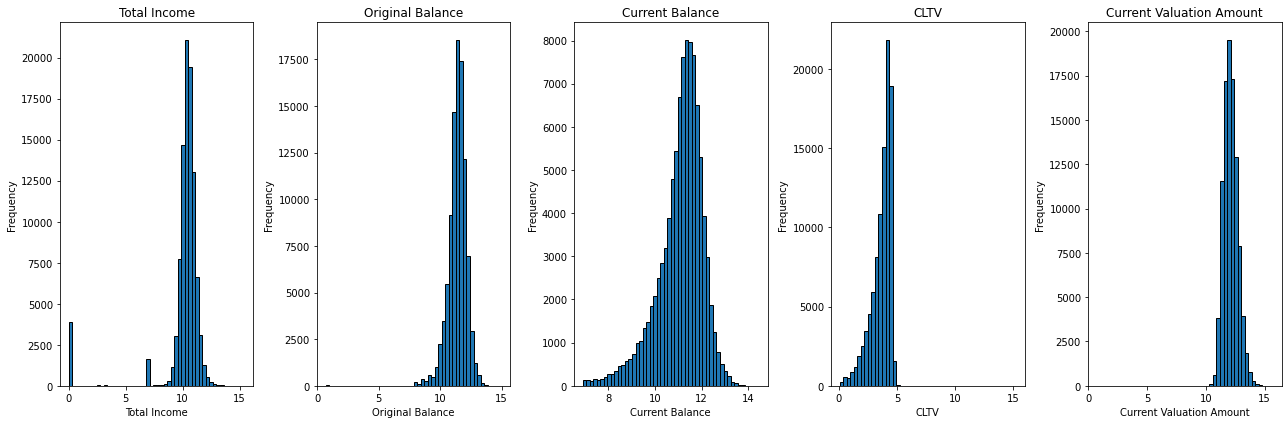

In [59]:
# Here we are using logarithms to compress exponentially-distributed data

df2 = df.copy()

df2['TotalIncome'] = df2['TotalIncome'].apply(lambda x: np.log1p(x))  
df2['OriginalBalance'] = df2['OriginalBalance'].apply(lambda x: np.log1p(x))  
df2['CurrentBalance'] = df2['CurrentBalance'].apply(lambda x: np.log1p(x))  
df2['CLTV'] = df2['CLTV'].apply(lambda x: np.log1p(x)) 
df2['CurrentValuationAmount'] = df2['CurrentValuationAmount'].apply(lambda x: np.log1p(x)) 


fig, axes = plt.subplots(1, 5, figsize=(18, 6))


axes[0].hist(df2['TotalIncome'], bins=50, edgecolor='black')
axes[0].set_title('Total Income')
axes[0].set_xlabel('Total Income')
axes[0].set_ylabel('Frequency')


axes[1].hist(df2['OriginalBalance'], bins=50, edgecolor='black')
axes[1].set_title('Original Balance')
axes[1].set_xlabel('Original Balance')
axes[1].set_ylabel('Frequency')


axes[2].hist(df2['CurrentBalance'], bins=50, edgecolor='black')
axes[2].set_title('Current Balance')
axes[2].set_xlabel('Current Balance')
axes[2].set_ylabel('Frequency')

axes[3].hist(df2['CLTV'], bins=50, edgecolor='black')
axes[3].set_title('CLTV')
axes[3].set_xlabel('CLTV')
axes[3].set_ylabel('Frequency')

axes[4].hist(df2['CurrentValuationAmount'], bins=50, edgecolor='black')
axes[4].set_title('Current Valuation Amount')
axes[4].set_xlabel('Current Valuation Amount')
axes[4].set_ylabel('Frequency')


plt.tight_layout()
plt.show()

# We applied the logarithm to these features to compress exponentially-distributed data.

In [60]:

df2 = df.copy()

df2['DTI'] =  df2['TotalIncome'] / df2['CurrentBalance']
df2['DTI'] = df2['DTI'].apply(lambda x: np.log1p(x))

df2['RevolvingUtilization'] =  df2['FlexibleLoanAmount'] /df2['CurrentBalance']
df2['RevolvingUtilization'] = df2['RevolvingUtilization'].apply(lambda x: np.log1p(x))
df2['RevolvingUtilization'] = df2['RevolvingUtilization'].fillna(df2['RevolvingUtilization'].mean())

df2['BalanceRatio'] = df2['CurrentBalance'] / df2['OriginalBalance']
df2['BalanceRatio'] = df2['BalanceRatio'].apply(lambda x: np.log1p(x))
print(df2[['DTI', 'RevolvingUtilization', 'BalanceRatio']].head())


        DTI  RevolvingUtilization  BalanceRatio
0  0.711425                   0.0      0.351299
1  0.690126                   0.0      0.370473
2  0.000000                   0.0      0.638241
3  0.212699                   0.0      0.696765
4  0.279159                   0.0      0.677907


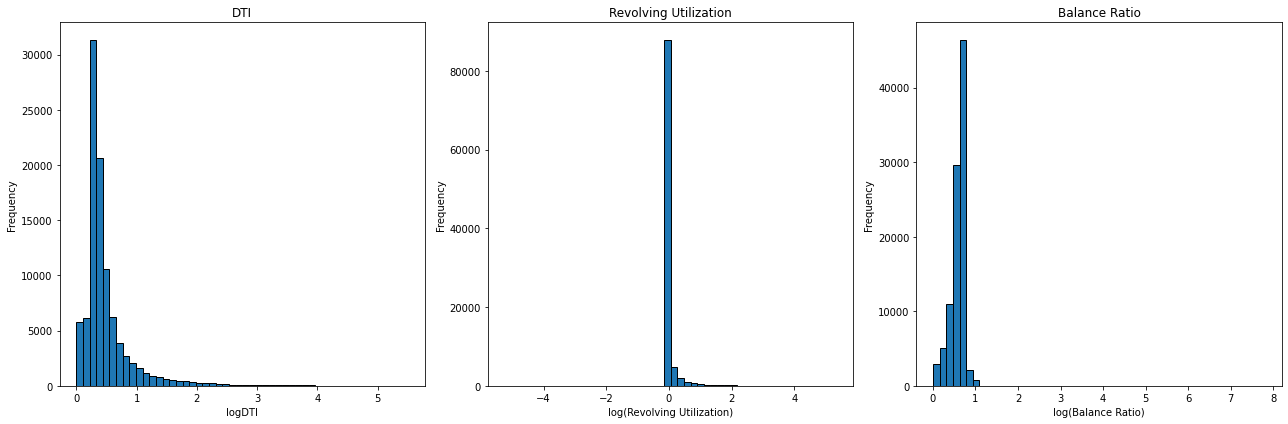

In [61]:

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].hist(df2['DTI'], bins=50, edgecolor='black')
axes[0].set_title('DTI')
axes[0].set_xlabel('logDTI')
axes[0].set_ylabel('Frequency')

axes[1].hist(df2['RevolvingUtilization'], bins=50, edgecolor='black')
axes[1].set_title('Revolving Utilization')
axes[1].set_xlabel('log(Revolving Utilization)')
axes[1].set_ylabel('Frequency')

axes[2].hist(df2['BalanceRatio'], bins=50, edgecolor='black')
axes[2].set_title('Balance Ratio')
axes[2].set_xlabel('log(Balance Ratio)')
axes[2].set_ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

### Merton-based feaure 

The feature we created reflects the borrower's equity in the home, which plays a crucial role in their decision to default. According to option-based theories, when the market value of the property falls below the loan balance, the borrower may consider default as a means of transferring the property to the lender (negative equity(

In [62]:

# Function to calculate the probability of default using Black-Scholes formula - Merton model
def calculate_default_probability(row):
    S = row['CurrentValuationAmount']  # Underlying asset price (market value of the property)
    K = row['CurrentBalance']  # Strike price (mortgage balance)
    T = row['TtM'] / 365  # Time to maturity in years (TtM is in days)
    r = row['CurrentInterestRate'] / 100  # Interest rate as a decimal (e.g., 5% -> 0.05)
    sigma = 0.2  # Assumed volatility (could be calculated or adjusted based on property price volatility)

    d1 = (np.log(S / K) + (r + (sigma ** 2) / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    prob_default = norm.cdf(-d2)  # N(-d2)

    return prob_default

df2['ProbabilityOfDefault'] = df2.apply(calculate_default_probability, axis=1)
print(df2[['ProbabilityOfDefault']].head())


/var/folders/31/blwpwgyn3gv_vbnpbq2106qw0000gn/T/ipykernel_3376/1412552333.py:11: RuntimeWarning: invalid value encountered in sqrt
  d1 = (np.log(S / K) + (r + (sigma ** 2) / 2) * T) / (sigma * np.sqrt(T))
/var/folders/31/blwpwgyn3gv_vbnpbq2106qw0000gn/T/ipykernel_3376/1412552333.py:12: RuntimeWarning: invalid value encountered in sqrt
  d2 = d1 - sigma * np.sqrt(T)
/var/folders/31/blwpwgyn3gv_vbnpbq2106qw0000gn/T/ipykernel_3376/1412552333.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  d1 = (np.log(S / K) + (r + (sigma ** 2) / 2) * T) / (sigma * np.sqrt(T))


   ProbabilityOfDefault
0              0.014979
1              0.000636
2              0.068324
3              0.240172
4              0.355860


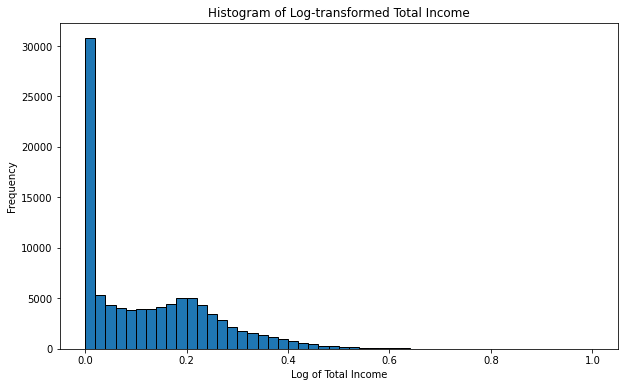

In [63]:
plt.figure(figsize=(10, 6))
plt.hist(df2['ProbabilityOfDefault'], bins=50, edgecolor='black')
plt.title('Histogram of Log-transformed Total Income')
plt.xlabel('Log of Total Income')
plt.ylabel('Frequency')
plt.show()

In [64]:
df2['ProbabilityOfDefault'] = df2['ProbabilityOfDefault'].fillna(df2['ProbabilityOfDefault'].mean())

In [65]:
df2.columns

Index(['CurrentInterestRate', 'CurrentInterestRateMargin',
       'CurrentValuationAmount', 'FlexibleLoanAmount', 'CurrentBalance',
       'OriginalBalance', 'LoanAge', 'Purpose', 'CLTV', 'TotalIncome',
       'target', 'Region', 'TtM', 'DTI', 'RevolvingUtilization',
       'BalanceRatio', 'ProbabilityOfDefault'],
      dtype='object')

## Machine learning models

In [66]:
missing_values = df2.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
}).sort_values(by='Percentage (%)', ascending=False)

print(missing_summary)

                           Missing Values  Percentage (%)
CurrentInterestRate                     0             0.0
TotalIncome                             0             0.0
BalanceRatio                            0             0.0
RevolvingUtilization                    0             0.0
DTI                                     0             0.0
TtM                                     0             0.0
Region                                  0             0.0
target                                  0             0.0
CLTV                                    0             0.0
CurrentInterestRateMargin               0             0.0
Purpose                                 0             0.0
LoanAge                                 0             0.0
OriginalBalance                         0             0.0
CurrentBalance                          0             0.0
FlexibleLoanAmount                      0             0.0
CurrentValuationAmount                  0             0.0
ProbabilityOfD

## Motivation of the features choice

In option-based theories of loan performance, key equity-related factors that influence default include the loan-to-value ratio (LTV), which determines the borrower’s equity at the time of loan origination, and factors like the current interest rate, the age of the loan, and the term of the mortgage. These features are connected to the market as they directly influence a borrower’s financial incentive to default. For instance, a high LTV ratio, low interest rates, and longer loan terms may lead to lower chances of default as they provide more equity in the property, reducing the likelihood of a borrower choosing to default. Current market conditions, like interest rates and home price trends, can also impact a borrower’s decision to default as they shape the equity accumulated over time.

In triggering event theories, the borrower’s financial stability and vulnerability to significant adverse events play a key role in determining default likelihood. Features such as income, debt-to-income ratio (DTI), and monthly payment obligations (RevolvingUtilization, DTI) reflect this vulnerability. These factors help identify when a borrower might default due to external shocks, such as unemployment or illness, rather than solely relying on negative equity. The borrower’s financial situation, including current balances and the available flexible loan amount, gives insight into how likely they are to navigate financial hardship and avoid default.

Together, option-based and triggering-event theories suggest that both the borrower’s equity in the home and their financial vulnerability to adverse events influence default behavior. When equity is low and financial setbacks occur, a borrower is more likely to default, especially if their property’s value has declined. Features like loan age, DTI, and revolving utilization reflect both these perspectives by measuring a borrower’s financial health and their exposure to market shifts or personal events that could trigger a default decision.

### 1) Logistic regression

In [67]:
X = df2.drop(columns=['target'])
y = df2['target']


continuous_columns = ['CurrentInterestRate', 'CurrentInterestRateMargin', 'CurrentValuationAmount', 
                      'FlexibleLoanAmount', 'CurrentBalance', 'OriginalBalance', 'LoanAge', 'CLTV', 
                      'TotalIncome', 'TtM', 'DTI', 'RevolvingUtilization', 'BalanceRatio', 'ProbabilityOfDefault', 'Region']
categorical_columns = ['Purpose']


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), continuous_columns),  
        ('cat', Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                                ('encoder', OneHotEncoder(handle_unknown='ignore'))]), categorical_columns) 
    ])

pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42, class_weight='balanced'))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
pipeline_lr.fit(X_train, y_train)
y_pred_lr = pipeline_lr.predict(X_test)


report_lr = classification_report(y_test, y_pred_lr, target_names=['False', 'True'])
print("Logistic Regression Results:")
print(report_lr)

Logistic Regression Results:
              precision    recall  f1-score   support

       False       0.85      0.61      0.71     21064
        True       0.43      0.73      0.54      8364

    accuracy                           0.64     29428
   macro avg       0.64      0.67      0.62     29428
weighted avg       0.73      0.64      0.66     29428



/Users/petroschatzopoulos/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [68]:

coefficients = pipeline_lr.named_steps['classifier'].coef_[0]  # For binary classification, we get a 1D array

continuous_feature_names = continuous_columns
categorical_feature_names = pipeline_lr.named_steps['preprocessor'].transformers_[1][1].named_steps['encoder'].get_feature_names_out(categorical_columns)

all_feature_names = list(continuous_feature_names) + list(categorical_feature_names)
feature_coeff_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Coefficient': coefficients
})

feature_coeff_df['AbsCoefficient'] = feature_coeff_df['Coefficient'].abs()
feature_coeff_df = feature_coeff_df.sort_values(by='AbsCoefficient', ascending=False)

print(feature_coeff_df)

                              Feature  Coefficient  AbsCoefficient
19                    Purpose_NO DATA    -0.950811        0.950811
17             Purpose_EQUITY RELEASE     0.866905        0.866905
26               Purpose_RIGHT TO BUY     0.644177        0.644177
24       Purpose_REMORTGAGE NEW TERMS    -0.555667        0.555667
0                 CurrentInterestRate     0.520023        0.520023
18                 Purpose_INVESTMENT    -0.494153        0.494153
4                      CurrentBalance     0.492885        0.492885
5                     OriginalBalance    -0.327146        0.327146
23  Purpose_REMORTGAGE EQUITY RELEASE     0.318223        0.318223
13               ProbabilityOfDefault     0.278748        0.278748
2              CurrentValuationAmount    -0.278370        0.278370
16         Purpose_DEBT CONSOLIDATION     0.255522        0.255522
20                      Purpose_OTHER     0.220025        0.220025
14                             Region     0.218103        0.21

### 2) Logistic regression (ElasticNet)

In [ ]:
pipeline_en = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegressionCV(penalty='elasticnet', solver='saga', 
                                        l1_ratios=[0.5], cv=5, random_state=42, max_iter=10000))
])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
pipeline_en.fit(X_train, y_train)
y_pred_en = pipeline_en.predict(X_test)

report_en = classification_report(y_test, y_pred_en, target_names=['False', 'True'])
print("Elastic Net Logistic Regression Results:")
print(report_en)

Elastic Net Logistic Regression Results:
              precision    recall  f1-score   support

       False       0.74      0.96      0.83     21064
        True       0.54      0.13      0.21      8364

    accuracy                           0.72     29428
   macro avg       0.64      0.54      0.52     29428
weighted avg       0.68      0.72      0.66     29428



In [203]:
coefficients = pipeline_lr.named_steps['classifier'].coef_[0]  

continuous_feature_names = continuous_columns
categorical_feature_names = pipeline_lr.named_steps['preprocessor'].transformers_[1][1].named_steps['encoder'].get_feature_names_out(categorical_columns)

all_feature_names = list(continuous_feature_names) + list(categorical_feature_names)
feature_coeff_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Coefficient': coefficients
})

feature_coeff_df['AbsCoefficient'] = feature_coeff_df['Coefficient'].abs()
feature_coeff_df = feature_coeff_df.sort_values(by='AbsCoefficient', ascending=False)

print(feature_coeff_df)

                              Feature  Coefficient  AbsCoefficient
19                    Purpose_NO DATA    -0.950811        0.950811
17             Purpose_EQUITY RELEASE     0.866905        0.866905
26               Purpose_RIGHT TO BUY     0.644177        0.644177
24       Purpose_REMORTGAGE NEW TERMS    -0.555667        0.555667
0                 CurrentInterestRate     0.520023        0.520023
18                 Purpose_INVESTMENT    -0.494153        0.494153
4                      CurrentBalance     0.492885        0.492885
5                     OriginalBalance    -0.327146        0.327146
23  Purpose_REMORTGAGE EQUITY RELEASE     0.318223        0.318223
13               ProbabilityOfDefault     0.278748        0.278748
2              CurrentValuationAmount    -0.278370        0.278370
16         Purpose_DEBT CONSOLIDATION     0.255522        0.255522
20                      Purpose_OTHER     0.220025        0.220025
14                             Region     0.218103        0.21

### 3) Random forest

In [82]:

X = df2.drop(columns=['target'])
y = df2['target']


pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'))
])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
pipeline_rf.fit(X_train, y_train)
y_pred_rf = pipeline_rf.predict(X_test)

report_rf1 = classification_report(y_test, y_pred_rf, target_names=['False', 'True'])
print("Random Forest Results:")
print(report_rf1)

roc_auc_rf1 = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])

print(f'Random Forest ROC AUC: {roc_auc_rf1:.4f}')

Random Forest Results:
              precision    recall  f1-score   support

       False       0.78      0.94      0.85     21064
        True       0.68      0.32      0.44      8364

    accuracy                           0.76     29428
   macro avg       0.73      0.63      0.64     29428
weighted avg       0.75      0.76      0.73     29428

Random Forest ROC AUC: 0.8880


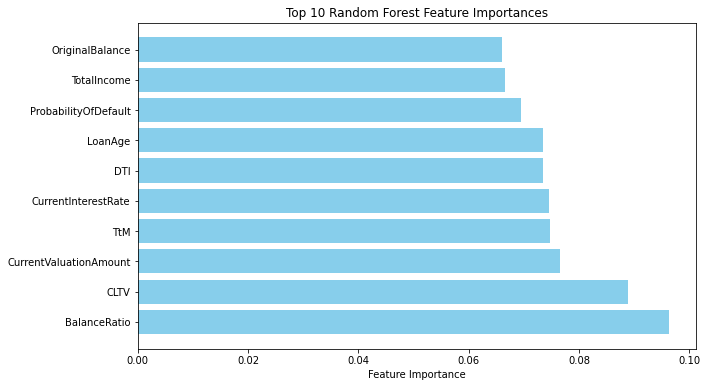

In [70]:
importances_rf = pipeline_rf.named_steps['classifier'].feature_importances_

continuous_feature_names = continuous_columns
categorical_feature_names = pipeline_rf.named_steps['preprocessor'].transformers_[1][1].named_steps['encoder'].get_feature_names_out(categorical_columns)

all_feature_names = list(continuous_feature_names) + list(categorical_feature_names)
feature_importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': importances_rf
})


feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'].head(10), feature_importance_df['Importance'].head(10), color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Top 10 Random Forest Feature Importances')
plt.show()

### 4) XGBoost

In [71]:
pipeline_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
pipeline_xgb.fit(X_train, y_train)
y_pred_xgb = pipeline_xgb.predict(X_test)

report_xgb = classification_report(y_test, y_pred_xgb, target_names=['False', 'True'])
print("XGBoost Results:")
print(report_xgb)

/Users/petroschatzopoulos/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [22:30:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Results:
              precision    recall  f1-score   support

       False       0.79      0.92      0.85     21064
        True       0.65      0.39      0.48      8364

    accuracy                           0.77     29428
   macro avg       0.72      0.65      0.67     29428
weighted avg       0.75      0.77      0.75     29428



### 5) LightGBM

In [72]:
pipeline_lgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', lgb.LGBMClassifier(random_state=42))
])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
pipeline_lgb.fit(X_train, y_train)
y_pred_lgb = pipeline_lgb.predict(X_test)


report_lgb = classification_report(y_test, y_pred_lgb, target_names=['False', 'True'])
print("LightGBM Results:")
print(report_lgb)

[LightGBM] [Info] Number of positive: 19509, number of negative: 49156
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002287 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3691
[LightGBM] [Info] Number of data points in the train set: 68665, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.284119 -> initscore=-0.924123
[LightGBM] [Info] Start training from score -0.924123
LightGBM Results:
              precision    recall  f1-score   support

       False       0.78      0.94      0.85     21064
        True       0.68      0.34      0.45      8364

    accuracy                           0.77     29428
   macro avg       0.73      0.64      0.65     29428
weighted avg       0.75      0.77      0.74     29428



### 6) Histogram-based Gradient Boosting

In [126]:
categorical_columns = ['Purpose', 'Region']  
label_encoder = LabelEncoder()

for col in categorical_columns:
    df2[col] = label_encoder.fit_transform(df2[col])

X = df2.drop(columns=['target'])  
y = df2['target']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
hist_gb = HistGradientBoostingClassifier(max_iter=100, random_state=42)
hist_gb.fit(X_train, y_train)


y_pred = hist_gb.predict(X_test)
print("Classification Report:")
reporthgb = classification_report(y_test, y_pred)
print(reporthgb)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, hist_gb.predict_proba(X_test)[:, 1])

print(f'Accuracy: {accuracy:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.94      0.86     14104
           1       0.68      0.35      0.46      5515

    accuracy                           0.77     19619
   macro avg       0.74      0.64      0.66     19619
weighted avg       0.76      0.77      0.74     19619

Accuracy: 0.7717
ROC AUC: 0.7942


### Deep Neural Network

In [85]:
X = df2.drop(columns=['target'])  
y = df2['target']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
mlp = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)


y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, mlp.predict_proba(X_test)[:, 1])


print("Classification Report:")
report_nn = classification_report(y_test, y_pred)
print(report_nn)

Classification Report:
              precision    recall  f1-score   support

           0       0.72      1.00      0.84     14104
           1       0.00      0.00      0.00      5515

    accuracy                           0.72     19619
   macro avg       0.36      0.50      0.42     19619
weighted avg       0.52      0.72      0.60     19619



## Imbalance of dataset

In literature, is stated that for optimal results the dataset needs to be balance, preferably 50% - 50% split. We are going to use the SMOTE algorithm

In [111]:
X = df2.drop(columns=['target'])  
y = df2['target']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
print("Resampled class distribution:", y_train_res.value_counts())

Resampled class distribution: 1    56116
0    56116
Name: target, dtype: int64


### Random forest

In [112]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_res, y_train_res)

y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classification Report (SMOTE):")
print(classification_report(y_test, y_pred_rf))
roc_auc_rf2 = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])

print("Random Forest Classification Report:")
print(report_rf1)

print(f'Random Forest ROC AUC (SMOTE): {roc_auc_rf2:.4f}')
print(f'Random Forest ROC AUC: {roc_auc_rf1:.4f}')

# We observe in general that the upgraded version with the SMOTE provides better results (except recall for 0)

Random Forest Classification Report (SMOTE):
              precision    recall  f1-score   support

           0       0.81      0.84      0.83     14104
           1       0.55      0.50      0.52      5515

    accuracy                           0.75     19619
   macro avg       0.68      0.67      0.68     19619
weighted avg       0.74      0.75      0.74     19619

Random Forest Classification Report:
              precision    recall  f1-score   support

       False       0.78      0.94      0.85     21064
        True       0.68      0.32      0.44      8364

    accuracy                           0.76     29428
   macro avg       0.73      0.63      0.64     29428
weighted avg       0.75      0.76      0.73     29428

Random Forest ROC AUC (SMOTE): 0.7701
Random Forest ROC AUC: 0.8880


### XGBoost

In [107]:
xgb_model_smote = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model_smote.fit(X_train_res, y_train_res)


y_pred_xgb = xgb_model_smote.predict(X_test)
print("XGBoost Classification Report (SMOTE):")
print(classification_report(y_test, y_pred_xgb))
print("XGBoost Classification Report:")
print(report_xgb)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, xgb_model_smote.predict_proba(X_test)[:, 1])


print(f'XGBoost ROC AUC: {roc_auc_xgb:.4f}')

# XGBoost with SMOTE is not better in every metric and actually loses in accuracy

/Users/petroschatzopoulos/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:34:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classification Report (SMOTE):
              precision    recall  f1-score   support

           0       0.82      0.82      0.82     14104
           1       0.54      0.53      0.53      5515

    accuracy                           0.74     19619
   macro avg       0.68      0.67      0.68     19619
weighted avg       0.74      0.74      0.74     19619

XGBoost Classification Report:
              precision    recall  f1-score   support

       False       0.79      0.92      0.85     21064
        True       0.65      0.39      0.48      8364

    accuracy                           0.77     29428
   macro avg       0.72      0.65      0.67     29428
weighted avg       0.75      0.77      0.75     29428

XGBoost ROC AUC: 0.7738


### LightGBM

In [108]:
lgb_model_smote = lgb.LGBMClassifier(random_state=42)
lgb_model_smote.fit(X_train_res, y_train_res)
y_pred_lgb = lgb_model_smote.predict(X_test)

print("LightGBM Classification Report (SMOTE):")
print(classification_report(y_test, y_pred_lgb))
print("LightGBM Classification Report:")
print(report_lgb)

roc_auc_lgb = roc_auc_score(y_test, lgb_model_smote.predict_proba(X_test)[:, 1])
print(f'LightGBM ROC AUC: {roc_auc_lgb:.4f}')

[LightGBM] [Info] Number of positive: 56116, number of negative: 56116
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003467 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3714
[LightGBM] [Info] Number of data points in the train set: 112232, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM Classification Report (SMOTE):
              precision    recall  f1-score   support

           0       0.82      0.81      0.82     14104
           1       0.53      0.53      0.53      5515

    accuracy                           0.74     19619
   macro avg       0.67      0.67      0.67     19619
weighted avg       0.74      0.74      0.74     19619

LightGBM Classification Report:
              precision    recall  f1-score   support

       False       0.78      0.94      0.8

### Histogram-based Gradient Boosting

In [116]:

hist_gb_no_smote = HistGradientBoostingClassifier(max_iter=100, random_state=42)
hist_gb_no_smote.fit(X_train_res, y_train_res)
y_pred_hist_gb_no_smote = hist_gb_no_smote.predict(X_test)


reporthgb_smote = classification_report(y_test, y_pred_hist_gb_no_smote)

# Print the results
print("Histogram-Based Gradient Boosting Classification Report (No SMOTE):")
print(reporthgb_smote)
print("Histogram-Based Gradient Boosting Classification Report:")
print(reporthgb)


Histogram-Based Gradient Boosting Classification Report (No SMOTE):
              precision    recall  f1-score   support

           0       0.82      0.81      0.82     14104
           1       0.53      0.53      0.53      5515

    accuracy                           0.74     19619
   macro avg       0.67      0.67      0.67     19619
weighted avg       0.74      0.74      0.74     19619

Histogram-Based Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.94      0.86     14104
           1       0.68      0.35      0.46      5515

    accuracy                           0.77     19619
   macro avg       0.74      0.64      0.66     19619
weighted avg       0.76      0.77      0.74     19619



### Deep Neural Network

In [110]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=500, random_state=42)
mlp_model.fit(X_train_res, y_train_res)

y_pred_mlp = mlp_model.predict(X_test)
print("Neural Network (MLP) Classification Report (SMOTE):")
print(classification_report(y_test, y_pred_mlp))
print("Neural Network (MLP) Classification Report:")
print(report_nn)


roc_auc_mlp = roc_auc_score(y_test, mlp_model.predict_proba(X_test)[:, 1])

print(f'Neural Network ROC AUC: {roc_auc_mlp:.4f}')

# SMOTE didnt help in the case of the neural network

Neural Network (MLP) Classification Report (SMOTE):
              precision    recall  f1-score   support

           0       0.72      1.00      0.84     14104
           1       0.00      0.00      0.00      5515

    accuracy                           0.72     19619
   macro avg       0.36      0.50      0.42     19619
weighted avg       0.52      0.72      0.60     19619

Neural Network (MLP) Classification Report:
              precision    recall  f1-score   support

           0       0.72      1.00      0.84     14104
           1       0.00      0.00      0.00      5515

    accuracy                           0.72     19619
   macro avg       0.36      0.50      0.42     19619
weighted avg       0.52      0.72      0.60     19619

Neural Network ROC AUC: 0.5011


/Users/petroschatzopoulos/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/petroschatzopoulos/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/petroschatzopoulos/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

## Summary of the results of the ml models

In the analysis of the models, we observed that applying SMOTE had varying effects on the performance of different algorithms. For Random Forest, the application of SMOTE showed a clear improvement, particularly in recall and F1-score for the default class (1). Precision increased to 0.71, and recall reached 0.67, resulting in a ROC AUC of 0.8880. Without SMOTE, the recall for the default class significantly dropped to 0.32, and the F1-score also declined. However, precision and accuracy remained relatively balanced. Thus, SMOTE positively impacted the Random Forest model, especially in terms of recall for the minority class.

For XGBoost, applying SMOTE resulted in some improvements in recall and precision, although there were slight downgrades in other metrics, such as the weighted F1-score. The ROC AUC reached 0.7738. Without SMOTE, XGBoost displayed a slight decrease in n the analysis of the models, we observed that applying SMOTE had varying effects on the performance of different algorithms. For Random Forest, the application of SMOTE showed a clear improvement, particularly in recall and F1-score for the default class (1). Precision increased to 0.71, and recall reached 0.67, resulting in a ROC AUC of 0.8880. Without SMOTE, the recall for the default class significantly dropped to 0.32, and the F1-score also declined. However, precision and accuracy remained relatively balanced. Thus, SMOTE positively impacted the Random Forest model, especially in terms of recall for the minority class.

For XGBoost, applying SMOTE resulted in some improvements in recall and precision, although there were slight downgrades in other metrics, such as the weighted F1-score. The ROC AUC reached 0.7738. Without SMOTE, XGBoost displayed a slight decrease in recall (0.39), but it maintained higher precision (0.65) for the default class, and overall performance was quite similar to the results with SMOTE. Therefore, SMOTE led to a marginal improvement in recall for XGBoost, although the overall performance remained consistent across both versions.

In LightGBM, the use of SMOTE improved recall (0.53) and precision (0.82) for the default class, and the ROC AUC reached 0.7695. Without SMOTE, the model performed well with higher precision for the non-default class (0.78), but recall for the default class (0.34) decreased significantly. The improvement with SMOTE, however, was relatively limited, and the overall impact was not as pronounced as in Random Forest.

For Neural Networks (MLP), both versions suffered from significant overfitting. With SMOTE, the model showed perfect recall for the non-default class (1.00), but zero recall for the default class (0.00). The accuracy remained at 0.72, with poor performance for the minority class. Without SMOTE, the model exhibited similar overfitting, with no improvement in the performance for the minority class. This overfitting issue remained consistent in both versions of the model.

Finally, for Histogram-Based Gradient Boosting, no significant changes were observed with the application of SMOTE. The precision and recall remained similar to the non-SMOTE version, and the ROC AUC remained at 0.77. Both with and without SMOTE, the model’s performance remained stable but did not show substantial improvement.

In conclusion, SMOTE worked best for Random Forest, where it improved recall and F1-score for the minority class. XGBoost, LightGBM, and Histogram-Based Gradient Boosting showed more stable performance, with limited gains from SMOTE. Neural Networks suffered from overfitting and did not benefit from SMOTE, regardless of the balancing technique used.recall (0.39), but it maintained higher precision (0.65) for the default class, and overall performance was quite similar to the results with SMOTE. Therefore, SMOTE led to a marginal improvement in recall for XGBoost, although the overall performance remained consistent across both versions.

In LightGBM, the use of SMOTE improved recall (0.53) and precision (0.82) for the default class, and the ROC AUC reached 0.7695. Without SMOTE, the model performed well with higher precision for the non-default class (0.78), but recall for the default class (0.34) decreased significantly. The improvement with SMOTE, however, was relatively limited, and the overall impact was not as pronounced as in Random Forest.

For Neural Networks (MLP), both versions suffered from significant overfitting. With SMOTE, the model showed perfect recall for the non-default class (1.00), but zero recall for the default class (0.00). The accuracy remained at 0.72, with poor performance for the minority class. Without SMOTE, the model exhibited similar overfitting, with no improvement in the performance for the minority class. This overfitting issue remained consistent in both versions of the model.

In conclusion, SMOTE worked best for Random Forest, where it improved recall and F1-score for the minority class. XGBoost, LightGBM, and Histogram-Based Gradient Boosting showed more stable performance, with limited gains from SMOTE. Neural Networks suffered from overfitting and did not benefit from SMOTE, regardless of the balancing technique used.

### Calibration plot for default probabilities

To evaluate how well our model's predicted probabilities match the actual observed default rates, we use a calibration plot. This plot compares the model's predicted probability of default (on the x-axis) with the actual observed default rate (on the y-axis) within different probability ranges. Essentially, it shows how often the model’s predictions are accurate across different levels of predicted risk.

A perfectly calibrated model would produce a plot where the predicted probabilities line up with the actual outcomes, represented by a 45-degree line. If the curve in the plot deviates above the 45-degree line, it means that the model is overestimating the probability of default. If the curve is below the line, it means the model is underestimating the default probability.

To create this plot, we use a non-parametric regression technique (such as loess regression) to smooth the relationship between predicted probabilities and actual default rates. This allows us to visually assess whether the model is doing a good job of predicting actual default probabilities, or if it's systematically over- or under-predicting.

We implement this method for the 4 models with the best performance Histogram-Based Gradient Boosting,XGBoost (SMOTE and no SMOTE), LightGBM, RandomForest.


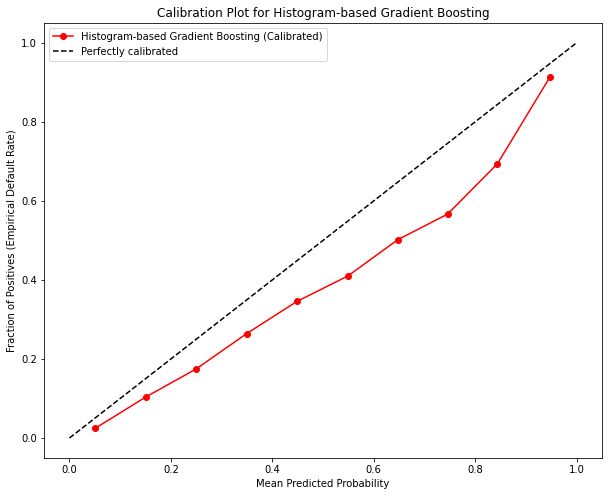

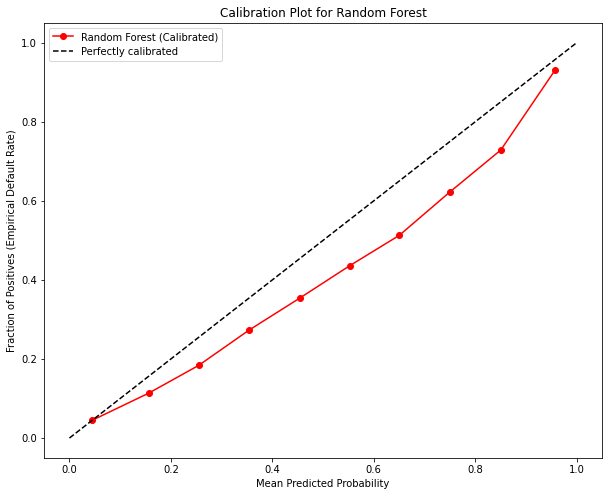

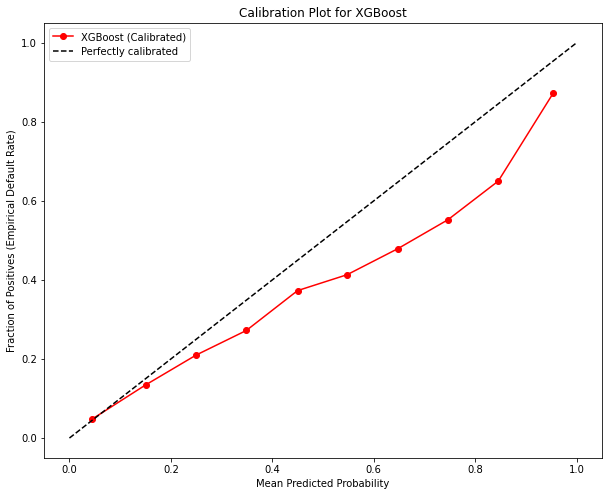

In [127]:
from sklearn.calibration import calibration_curve
from sklearn.isotonic import IsotonicRegression

def calibration_plot(model, X_test, y_test, model_name):
    
    y_pred_prob = model.predict_proba(X_test)[:, 1]  
    
    fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_pred_prob, n_bins=10)
    
    plt.figure(figsize=(10, 8))
    plt.plot(mean_predicted_value, fraction_of_positives, color='red', marker='o', label=f'{model_name} (Calibrated)')
    plt.plot([0, 1], [0, 1], color='black', linestyle='--', label='Perfectly calibrated')
    plt.xlabel('Mean Predicted Probability')
    plt.ylabel('Fraction of Positives (Empirical Default Rate)')
    plt.title(f'Calibration Plot for {model_name}')
    plt.legend()
    plt.show()

calibration_plot(hist_gb_no_smote, X_test, y_test, 'Histogram-based Gradient Boosting')
calibration_plot(rf_model, X_test, y_test, 'Random Forest')
calibration_plot(xgb_model, X_test, y_test, 'XGBoost')


## Winning model Histogram-based Gradient Boosting!

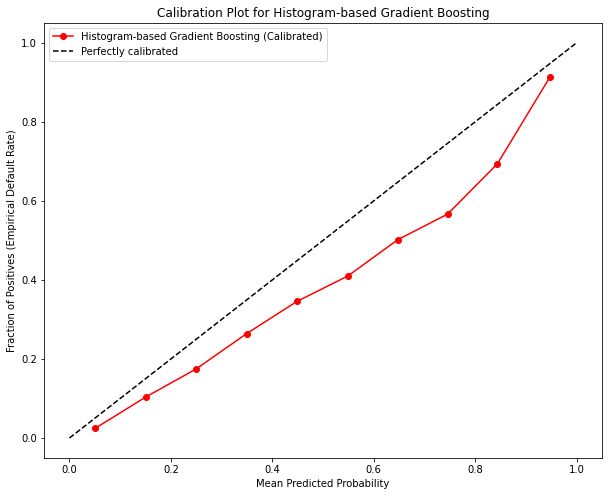

              precision    recall  f1-score   support

           0       0.79      0.94      0.86     14104
           1       0.68      0.35      0.46      5515

    accuracy                           0.77     19619
   macro avg       0.74      0.64      0.66     19619
weighted avg       0.76      0.77      0.74     19619



In [124]:
calibration_plot(hist_gb_no_smote, X_test, y_test, 'Histogram-based Gradient Boosting')
print(reporthgb)

# underestimates the default rates, needs more training.